# Predicting heart disease using machine learning¶

This project is attempts to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

Approach on this Project to gain the nesscessary output:

1) Problem definition
2) Data Infomration
3) Evaluation
4) Features
5) Modelling

## Classification Model

It is a Classification model of preditcting a Binary classification of whether or not someone has heart disease based on thier medical attributes data

## 1. Problem Definition¶

In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2.Data Information

The original data came from the Cleveland database from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

in our dataset, the independent variables were patients different medical attributes and the dependent variable is whether or not they have heart disease.

* Data Set Characteristics:  

Multivariate

* Number of Instances:

303

* Area:

Life

* Attribute Characteristics:

Categorical, Integer, Real

* Number of Attributes:

75

* Date Donated

1988-07-01

* Associated Tasks:

Classification
 
* Used Attributes:

14

#### Source :

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

* Donor:

David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

## Evaluation

This Project aims at 95% accuracy of predicting whether or not a patient has heart disease during the proof of concept.

#### Model evaluators used in this project :

* Model Selection :

train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV

* metrics :

confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

## Features

### Heart Disease Dictionary :

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
* thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)


#### Feature Importance :

Important features for predciting this case were listed down after completion

## Modelling

* Model Tested:

* Model with Highest yield:

## Tools utilized for this project 

* pandas for data analysis.
* NumPy for numerical operations.
* Matplotlib/seaborn for plotting or data visualization.
* Scikit-Learn for machine learning modelling and evaluation.



In [1]:
# Tools imported

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models utilized

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

# Model Evaluation utlized 

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
from sklearn.feature_selection import SelectKBest,chi2

# Save and load file

from joblib import dump,load


In [2]:
# importing dataset 

hrt_dis_lis = pd.read_csv("./data/heart_disease_dataset.csv")

# Getting Data info & decribtion 

hrt_dis_lis.info()

hrt_dis_lis.describe()

# from the data below we could fine that all the features are numerical features only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [3]:
# checking for missing values - no missing values found

hrt_dis_lis.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Exploration and Feature Selection

1    165
0    138
Name: target, dtype: int64

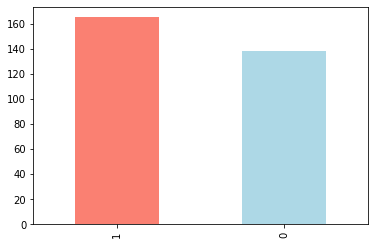

In [4]:
hrt_dis_lis.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

hrt_dis_lis.target.value_counts()

# from the below graph we can find number of person having heart disease is silghtly more than the number of person not having heart disease


In [5]:
# To find the corelation between the independent variables

corr_matrix = hrt_dis_lis.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


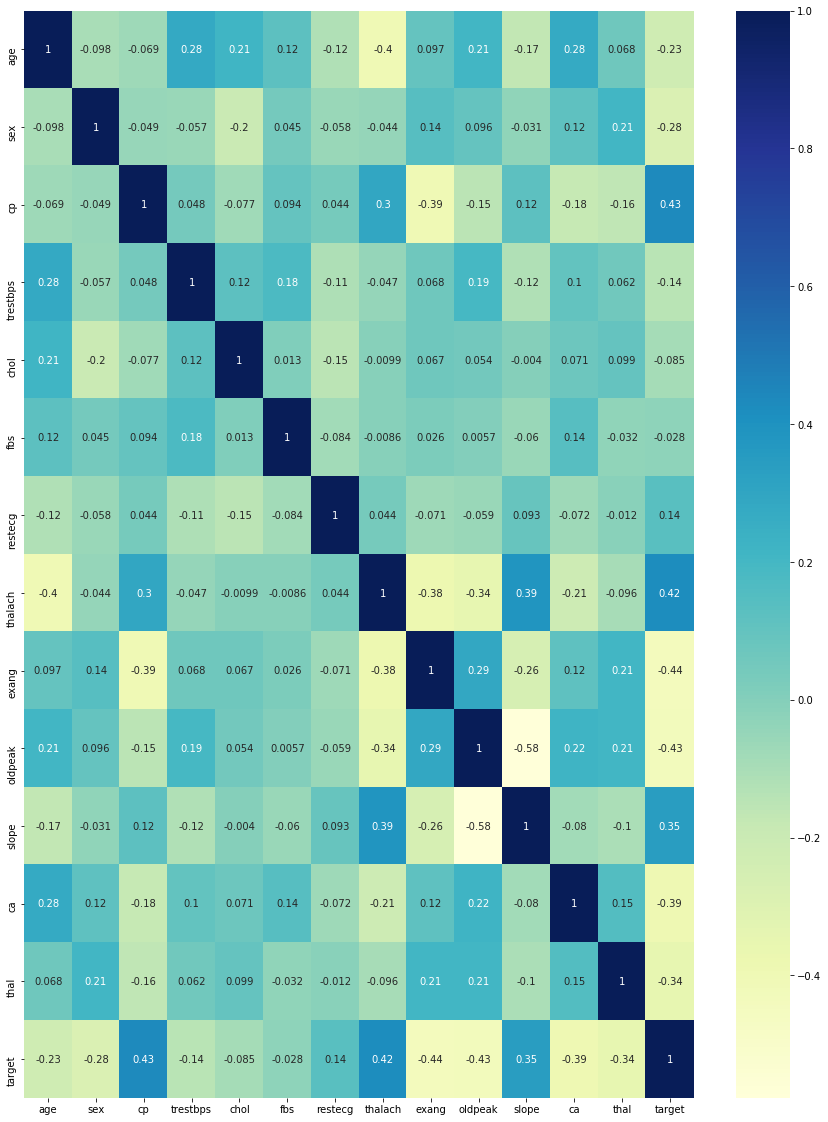

In [8]:
# using Corelation matrix with heat map to get feature corelation with Target

corr_matrix =hrt_dis_lis.corr()
fig,ax =plt.subplots(figsize=(15,20))
ax=sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu");

#### important features based on Co-relation (values >0.2) (Positive Corelated)
* Slope -0.35
* thalach - 0.42
* cp -0.43


#### Plotting important features obatined with Target 

* Slope
The slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart) 
2: Downslopins: signs of unhealthy heart


* Thalach
thalach - maximum heart rate achieved

* cp
cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart 
1: Atypical angina: chest pain not related to heart 
2: Non-anginal pain: typically esophageal spasms (non heart related) 
3: Asymptomatic: chest pain not showing signs of disease

Meaning - Angina
a condition marked by severe pain in the chest, often also spreading to the shoulders, arms, and neck, owing to an inadequate blood supply to the heart.

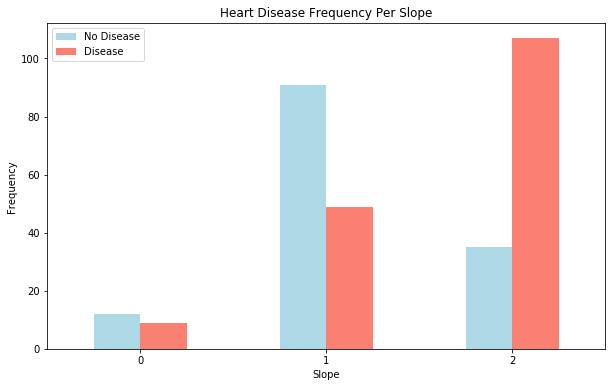

In [10]:
# Slope Vs Target

pd.crosstab(hrt_dis_lis.slope,hrt_dis_lis.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])
plt.title("Heart Disease Frequency Per Slope")
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [11]:
# Slope Vs Target values

pd.crosstab(hrt_dis_lis.slope,hrt_dis_lis.target)


target,0,1
slope,,
0,12,9
1,91,49
2,35,107


#### Slope vs Target conclusion

* for heart rate with excerise we could find the probablity of getting not heart disease is high in comparison to getting heart disease with respect to dataset 

* for a common heart type without excerise too probablity of getting not heart disease is high in comparison to getting heart disease with respect to dataset 

* for unhealthy heart type probablity of getting heart disease is high in comparison to not getting heart disease with respect to dataset 


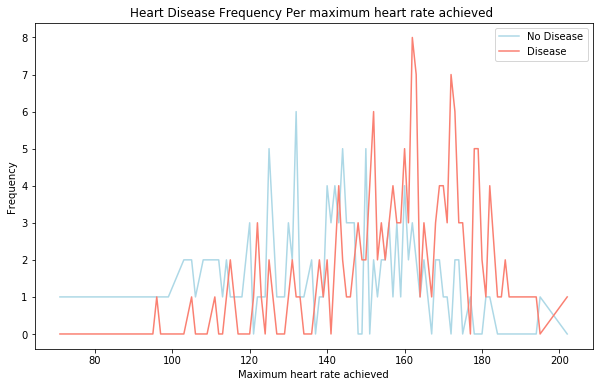

In [12]:
# maximum heart rate achieved vs Target

pd.crosstab(hrt_dis_lis.thalach,hrt_dis_lis.target).plot( 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency Per maximum heart rate achieved ")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

####  maximum heart rate achieved vs Target conclusion

we could find as it has positive corelation with target variable as the maximum heart rate increases heart disease probablity also increases

we could see from the graph ideal maximum heart rate for non heart disease is in the range of 125 - 143

Probablity of getting heart disease is more in the max heart rate range of 160 - 180


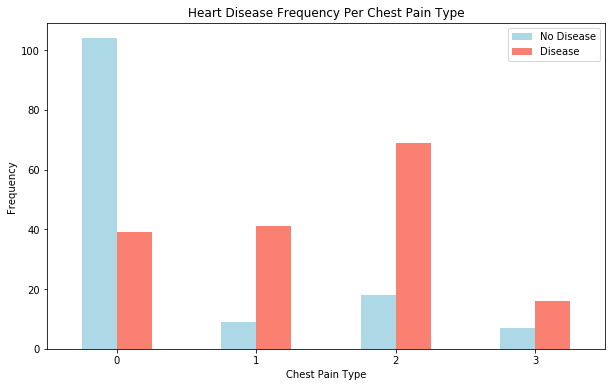

In [13]:
# chest pain type vs Target

pd.crosstab(hrt_dis_lis.cp, hrt_dis_lis.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

In [37]:
pd.crosstab(hrt_dis_lis.cp, hrt_dis_lis.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


####  Chest pain type vs Target conclusion

As per data we could understand that non heart related pain types are actually casuing heart disease whereas a typical angina is actaully having few heart disease cases only 


In [14]:
hrt_dis = pd.get_dummies(hrt_dis_lis, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [15]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
hrt_dis[columns_to_scale] = standardScaler.fit_transform(hrt_dis[columns_to_scale])

In [16]:
hrt_dis.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [41]:
hrt_dis.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [42]:
hrt_dis_lis.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

## Modelling

In [17]:
x=hrt_dis.drop("target",axis=1)
y=hrt_dis.target
np.random.seed(42)

# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2)


#### Baseline Algorithms

Machine Learning algorithms used :-

* Linear SVC
* Logistic Regression
* K Neighbours

##### Ensemble techniques :-

###### Bagging:-
* Decision Tree
* Random Forest

###### Boosting:-
* Adaboost

In [18]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "LSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "Adaboost": AdaBoostClassifier()}

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [19]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.8852459016393442,
 'LSVC': 0.8852459016393442,
 'KNN': 0.9016393442622951,
 'Random Forest': 0.8688524590163934,
 'DecisionTree': 0.8688524590163934,
 'Adaboost': 0.8032786885245902}

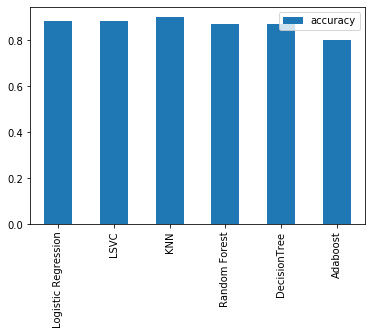

In [46]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

#### using 5 fold cross validation on baseline model

using cross validation on different models and trying to find its value for Accuracy,precision,Recall,F1

In [20]:
def fit_and_find(x_train, x_test, y_train, y_test):
    np.random.seed(42)
    modelslist = {"Logistic Regression": LogisticRegression(),
                  "LSVC": LinearSVC(),
                  "KNN": KNeighborsClassifier(),
                  "Random Forest": RandomForestClassifier(),
                  "DecisionTree": DecisionTreeClassifier(),
                  "Adaboost": AdaBoostClassifier()}
    model_finds = {}
    model_rep = ['accuracy','precision','recall','f1']
    for name,model in modelslist.items():
        model.fit(x_train,y_train)
        for rep in model_rep:
            a=np.mean(cross_val_score(model,x,y,cv=5,scoring=rep))
            model_finds[name+" "+rep]=a
    return model_finds

In [21]:
model_find = fit_and_find(x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_find

{'Logistic Regression accuracy': 0.8446994535519126,
 'Logistic Regression precision': 0.8512174893359354,
 'Logistic Regression recall': 0.8727272727272728,
 'Logistic Regression f1': 0.859986832270572,
 'LSVC accuracy': 0.8480874316939891,
 'LSVC precision': 0.8589328960296703,
 'LSVC recall': 0.8666666666666668,
 'LSVC f1': 0.8605220680574439,
 'KNN accuracy': 0.831584699453552,
 'KNN precision': 0.8341608544027899,
 'KNN recall': 0.8666666666666666,
 'KNN f1': 0.8489641241111829,
 'Random Forest accuracy': 0.8381420765027323,
 'Random Forest precision': 0.8333544170356314,
 'Random Forest recall': 0.8424242424242424,
 'Random Forest f1': 0.8451233108742752,
 'DecisionTree accuracy': 0.7388524590163934,
 'DecisionTree precision': 0.7508766233766233,
 'DecisionTree recall': 0.7818181818181819,
 'DecisionTree f1': 0.7573247504129856,
 'Adaboost accuracy': 0.8082513661202185,
 'Adaboost precision': 0.8025149411991517,
 'Adaboost recall': 0.8666666666666666,
 'Adaboost f1': 0.8323417528

#### plotting all the reported values 

from the below we can concluded on bases of baseline model Logistic regression and Random forest classifier have scored consistenly across all parameters in the range of 0.8 

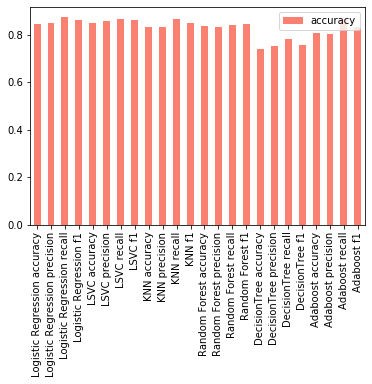

In [49]:
model_compare = pd.DataFrame(model_find, index=['accuracy'])
model_compare.T.plot.bar(color='salmon');

#### Baseline AUC curve report for models

* AUC curve value obtained each models:
1) Logistic regression - 0.92
2) Linear SVC - 0.92
3) KNN - 0.76
4) Random Forest - 0.92
5) Desicion Tree - 0.84
6) Adaboost - 0.86

From the values obtained we can find that Logistic regression , Linear SVC , Random Forest models have high AUC curve score

In [50]:
def fit_and_find_auc(x_train, x_test, y_train, y_test):
    np.random.seed(42)
    modelslist = {"Logistic Regression": LogisticRegression(),
                  "LSVC": LinearSVC(),
                  "KNN": KNeighborsClassifier(),
                  "Random Forest": RandomForestClassifier(),
                  "DecisionTree": DecisionTreeClassifier(),
                  "Adaboost": AdaBoostClassifier()}
    model_finds_auc = {}
    for name,model in modelslist.items():
        model.fit(x_train,y_train)
        plot_roc_curve(model, x_test, y_test)
    return plot_roc_curve

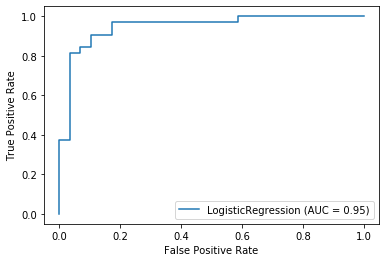

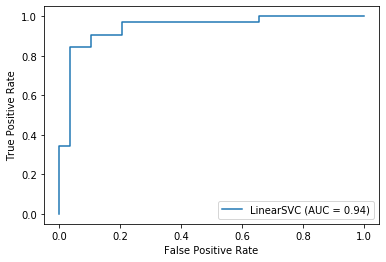

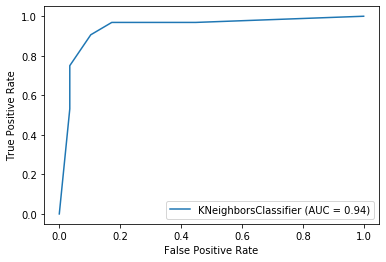

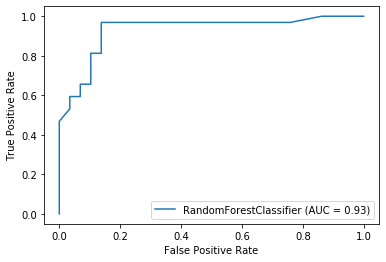

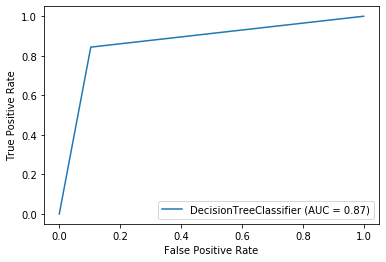

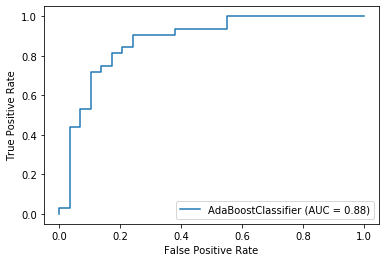

In [51]:
model_find_auc = fit_and_find_auc(x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_find_auc;

#### Baseline confusion martrix for models

Conclusion:-
from the plots obtained we can see that KNN performed porrly having many False positive and False Negative

In [52]:
def fit_and_find_conmatrix(x_train, x_test, y_train, y_test):
    np.random.seed(42)
    modelslist = {"Logistic Regression": LogisticRegression(),
                  "LSVC": LinearSVC(),
                  "KNN": KNeighborsClassifier(),
                  "Random Forest": RandomForestClassifier(),
                  "DecisionTree": DecisionTreeClassifier(),
                  "Adaboost": AdaBoostClassifier()}
    model_finds_auc = {}
    for name,model in modelslist.items():
        model.fit(x_train,y_train)
        y_preds=model.predict(x_test)
        fig, ax = plt.subplots(figsize=(3, 3))
        ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
        plt.title(name)
        plt.xlabel("True label")
        plt.ylabel("Predicted label")
    return ax

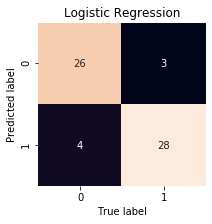

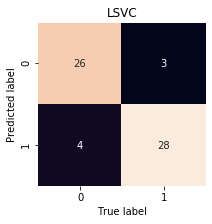

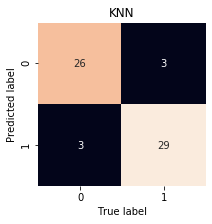

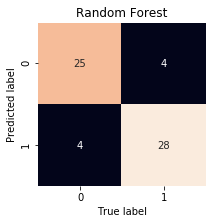

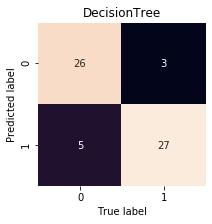

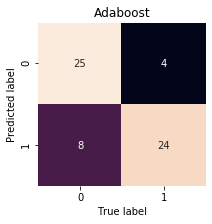

In [53]:
model_find_conmatrix = fit_and_find_conmatrix(x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_find_conmatrix;

#### Baseline Classification report for models

In [54]:
def fit_and_find_classify(models,x_train, x_test, y_train, y_test):
    np.random.seed(42)
    models.fit(x_train,y_train)
    y_preds=models.predict(x_test)
    return classification_report(y_test,y_preds)

In [55]:
model_find_classify = fit_and_find_classify(models=LogisticRegression(),x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
print("LogisticRegression")
print(model_find_classify)
model_find_classify = fit_and_find_classify(models=LinearSVC(),x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
print("LinearSVC")
print(model_find_classify)
model_find_classify = fit_and_find_classify(models=KNeighborsClassifier(),x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
print("KNeighborsClassifier")
print(model_find_classify)
model_find_classify = fit_and_find_classify(models=RandomForestClassifier(),x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
print("RandomForestClassifier")
print(model_find_classify)
model_find_classify = fit_and_find_classify(models=DecisionTreeClassifier(),x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
print("DecisionTreeClassifier")
print(model_find_classify)
model_find_classify = fit_and_find_classify(models=AdaBoostClassifier(),x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
print("AdaBoostClassifier")
print(model_find_classify)

LogisticRegression
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

LinearSVC
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90 

#### Hypertuning the parameter 

we have chosen below best parameters in each of these models through RandomizedsearchCV and then through GridsearchCV

* RandomizedsearchCV 

1) Logistic Regression - 
2) Linear SVC - 
3) KNN - 
4) RandomForestClassifier-
5) DesicionTrees-
6) ADAboost-

* GridSearchCV

1) Logistic Regression - 
2) Linear SVC - 
3) KNN - 
4) RandomForestClassifier-
5) DesicionTrees-
6) ADAboost-

In [22]:
# creating grid for hyperparameters for randomizedsearchCV on each model

def fit_and_find_rscv(x_train, x_test, y_train, y_test,total_grid):
    np.random.seed(42)
    modelslist = {"Logistic Regression": LogisticRegression(),
                  "Random Forest": RandomForestClassifier(),
                  "LSVC": LinearSVC(),
                  "KNN": KNeighborsClassifier(),
                  "Adaboost": AdaBoostClassifier()}
    model_finds_rscv = {}
    for name,model in modelslist.items():
        rs_log_reg = RandomizedSearchCV(model,
                                param_distributions=total_grid[name],
                                cv=5,
                                n_iter=20,
                                verbose=True)
        rs_log_reg.fit(x_train, y_train)
        model_finds_rscv[name]=rs_log_reg.best_params_
    return model_finds_rscv

In [23]:
log_rs_grid={"penalty":["l1", "l2"],
        "C": [0,1.0,2.0],
        "solver": ["sag","liblinear"],
        "max_iter":[10,20,50,100,200]}


ran_rs_grid={"n_estimators": np.arange(10, 1000, 50),
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf": np.arange(1, 20, 2)}

lin_rs_grid={"penalty":["l1", "l2"],
        "loss":["hinge", "squared_hinge"],
        "C": [0,1.0,2.0],
        "max_iter":[200,500,1000,1200]}


knn_rs_grid={"n_neighbors": [2,10,12,15],
        "weights":["uniform", "distance"],
        "algorithm":["auto", "ball_tree", "kd_tree", "brute"]}

ada_rs_grid={"n_estimators": np.arange(10, 1000, 50)}
                     
total_grid={"Logistic Regression":log_rs_grid,
            "Random Forest":ran_rs_grid,
            "LSVC":lin_rs_grid,
            "KNN":knn_rs_grid,
            "Adaboost":ada_rs_grid}

model_find_rscv = fit_and_find_rscv(x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test,
                          total_grid=total_grid)
model_find_rscv

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this 

C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The s

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrish

C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop

C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  warnings.warn("Estimator fit failed. The scor

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


{'Logistic Regression': {'solver': 'liblinear',
  'penalty': 'l1',
  'max_iter': 20,
  'C': 2.0},
 'Random Forest': {'n_estimators': 60,
  'min_samples_split': 16,
  'min_samples_leaf': 19,
  'max_depth': 3},
 'LSVC': {'penalty': 'l2', 'max_iter': 500, 'loss': 'squared_hinge', 'C': 2.0},
 'KNN': {'weights': 'distance', 'n_neighbors': 12, 'algorithm': 'auto'},
 'Adaboost': {'n_estimators': 10}}

In [24]:
# Getting Accuracy , Precision , Recall , F1 score for best paramater selected from RandomisedsearchCV:

def fit_and_find_rscv_bst(x_train, x_test, y_train, y_test):
    np.random.seed(42)
    #Logistic Regression
    grid_log={"solver": ["liblinear"],
              "penalty": ["l2"],
              "max_iter":[100],
              "C": [1.0]}
    name ="Logistic Regression"
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    model_finds_rscv_met={}
    clf=LogisticRegression()
    rs_clf = RandomizedSearchCV(estimator=clf,
                                param_distributions=grid_log,
                                cv=5,
                                n_iter=20,
                                verbose=True)
    rs_clf.fit(x_train, y_train)
    rs_y_preds=rs_clf.predict(x_test)
    accuracy= accuracy_score(y_test,rs_y_preds)
    precision=precision_score(y_test,rs_y_preds)
    recall=recall_score(y_test,rs_y_preds)
    f1=f1_score(y_test,rs_y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                     "precision":round(precision,2),
                     "recall":round(recall,2),
                     "f1":round(f1,2)}
    model_finds_rscv_met[name]=metric_dict
    #RandomForest Classifier
    grid_rf= {"n_estimators": [60],
              "min_samples_split": [16],
              "min_samples_leaf": [19],
              "max_depth": [10]}
    name ="Random Forest"
    clf=RandomForestClassifier()
    rs_clf = RandomizedSearchCV(estimator=clf,
                                param_distributions=grid_rf,
                                cv=5,
                                n_iter=20,
                                verbose=True)
    rs_clf.fit(x_train, y_train)
    rs_y_preds=rs_clf.predict(x_test)
    accuracy= accuracy_score(y_test,rs_y_preds)
    precision=precision_score(y_test,rs_y_preds)
    recall=recall_score(y_test,rs_y_preds)
    f1=f1_score(y_test,rs_y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}
    model_finds_rscv_met[name]=metric_dict
    #Linear SVC
    grid_lin= {"penalty":["l2"],
               "max_iter":[500],
               "loss": ["squared_hinge"],
                "C": [2.0]}
    name="Linear SVC"
    clf=LinearSVC()
    rs_clf = RandomizedSearchCV(estimator=clf,
                                param_distributions=grid_lin,
                                cv=5,
                                n_iter=20,
                                verbose=True)
    rs_clf.fit(x_train, y_train)
    rs_y_preds=rs_clf.predict(x_test)
    accuracy= accuracy_score(y_test,rs_y_preds)
    precision=precision_score(y_test,rs_y_preds)
    recall=recall_score(y_test,rs_y_preds)
    f1=f1_score(y_test,rs_y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                     "precision":round(precision,2),
                     "recall":round(recall,2),
                     "f1":round(f1,2)}
    model_finds_rscv_met[name]=metric_dict
    #Kneighbours Classification
    grid_knn= {"weights": ["distance"],
               "n_neighbors": [10],
               "algorithm": ["auto"]}

    name="KNN"
    clf=KNeighborsClassifier()
    rs_clf = RandomizedSearchCV(estimator=clf,
                                param_distributions=grid_knn,
                                cv=5,
                                n_iter=20,
                                verbose=True)
    rs_clf.fit(x_train, y_train)
    rs_y_preds=rs_clf.predict(x_test)
    accuracy= accuracy_score(y_test,rs_y_preds)
    precision=precision_score(y_test,rs_y_preds)
    recall=recall_score(y_test,rs_y_preds)
    f1=f1_score(y_test,rs_y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                     "precision":round(precision,2),
                     "recall":round(recall,2),
                     "f1":round(f1,2)}
    model_finds_rscv_met[name]=metric_dict
    #Adabooster
    grid_ada= {"n_estimators": [10]}
    name="ADAbooster"
    clf=AdaBoostClassifier()
    rs_clf = RandomizedSearchCV(estimator=clf,
                                param_distributions=grid_ada,
                                cv=5,
                                n_iter=20,
                                verbose=True)
    rs_clf.fit(x_train, y_train)
    rs_y_preds=rs_clf.predict(x_test)
    accuracy= accuracy_score(y_test,rs_y_preds)
    precision=precision_score(y_test,rs_y_preds)
    recall=recall_score(y_test,rs_y_preds)
    f1=f1_score(y_test,rs_y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                     "precision":round(precision,2),
                     "recall":round(recall,2),
                     "f1":round(f1,2)}
    model_finds_rscv_met[name]=metric_dict
    return model_finds_rscv_met

In [59]:
model_find_rscv_bst = fit_and_find_rscv_bst(x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)
model_find_rscv_bst

C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


{'Logistic Regression': {'accuracy': 0.89,
  'precision': 0.9,
  'recall': 0.88,
  'f1': 0.89},
 'Random Forest': {'accuracy': 0.85,
  'precision': 0.9,
  'recall': 0.81,
  'f1': 0.85},
 'Linear SVC': {'accuracy': 0.87,
  'precision': 0.88,
  'recall': 0.88,
  'f1': 0.88},
 'KNN': {'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89},
 'ADAbooster': {'accuracy': 0.85,
  'precision': 0.9,
  'recall': 0.81,
  'f1': 0.85}}

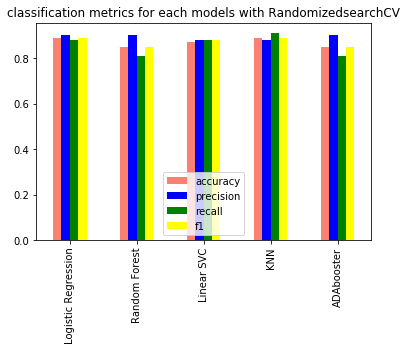

In [60]:
model_compare = pd.DataFrame(model_find_rscv_bst, index=['accuracy','precision','recall','f1'])
model_compare.T.plot.bar(color=['salmon','blue','green','yellow'],title="classification metrics for each models with RandomizedsearchCV");

### GridsearchCV for hypertuning on models

In [61]:
# creating grid for hyperparameters for gridsearchCV on each model

def fit_and_find_gscv(x_train, x_test, y_train, y_test,total_grid):
    np.random.seed(42)
    modelslist = {"Logistic Regression": LogisticRegression(),
                  "Random Forest": RandomForestClassifier(),
                  "LSVC": LinearSVC(),
                  "KNN": KNeighborsClassifier(),
                  "Adaboost": AdaBoostClassifier()}
    model_finds_gscv = {}
    for name,model in modelslist.items():
        gs_log_reg = GridSearchCV(model,
                                param_grid=total_grid[name],
                                cv=5,
                                verbose=True)
        gs_log_reg.fit(x_train, y_train)
        model_finds_gscv[name]=gs_log_reg.best_params_
    return model_finds_gscv

In [62]:
np.random.seed(42)
log_rs_grid={"penalty":["l1", "l2"],
        "C": [0,1.0,2.0],
        "solver": ["sag","liblinear"],
        "max_iter":[10,20,50,100,200]}


ran_rs_grid={"n_estimators": np.arange(10, 500, 50),
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 4),
        "min_samples_leaf": np.arange(1, 20, 4)}

lin_rs_grid={"penalty":["l1", "l2"],
        "loss":["hinge", "squared_hinge"],
        "C": [1.0,2.0],
        "max_iter":[200,500,1000]}


knn_rs_grid={"n_neighbors": [5,10,12,15],
        "weights":["uniform", "distance"],
        "algorithm":["auto", "ball_tree", "kd_tree", "brute"]}

ada_rs_grid={"n_estimators": np.arange(10, 500, 50)}
                     
total_grid={"Logistic Regression":log_rs_grid,
            "Random Forest":ran_rs_grid,
            "LSVC":lin_rs_grid,
            "KNN":knn_rs_grid,
            "Adaboost":ada_rs_grid}

model_find_gscv = fit_and_find_gscv(x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test,
                          total_grid=total_grid)
model_find_gscv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this 

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: b'C <= 0'

  warnings.warn("Estimator fit failed. The 

C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrish

C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\g

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed: 64.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameter

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Deta

C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_dise

C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_dise

C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\model_selection\_validation.py:532: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  warnings.warn("Estimator fit failed. The scor

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   25.0s finished


{'Logistic Regression': {'C': 2.0,
  'max_iter': 10,
  'penalty': 'l1',
  'solver': 'liblinear'},
 'Random Forest': {'max_depth': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 10},
 'LSVC': {'C': 1.0, 'loss': 'squared_hinge', 'max_iter': 200, 'penalty': 'l2'},
 'KNN': {'algorithm': 'auto', 'n_neighbors': 12, 'weights': 'distance'},
 'Adaboost': {'n_estimators': 10}}

In [63]:
# Getting Accuracy , Precision , Recall , F1 score for best paramater selected from gridsearchCV:

def fit_and_find_gscv_bst(x_train, x_test, y_train, y_test):
    np.random.seed(42)
    #Logistic Regression
    grid_log={"solver": ["liblinear"],
              "penalty": ["l1"],
              "max_iter":[10],
              "C": [2.0]}
    name ="Logistic Regression"
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    model_finds_rscv_met={}
    clf=LogisticRegression()
    rs_clf = GridSearchCV(estimator=clf,
                                param_grid=grid_log,
                                cv=5,
                                verbose=True)
    rs_clf.fit(x_train, y_train)
    rs_y_preds=rs_clf.predict(x_test)
    accuracy= accuracy_score(y_test,rs_y_preds)
    precision=precision_score(y_test,rs_y_preds)
    recall=recall_score(y_test,rs_y_preds)
    f1=f1_score(y_test,rs_y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                     "precision":round(precision,2),
                     "recall":round(recall,2),
                     "f1":round(f1,2)}
    model_finds_rscv_met[name]=metric_dict
    #RandomForest Classifier
    grid_rf= {"n_estimators": [10],
              "min_samples_split": [2],
              "min_samples_leaf": [5],
              "max_depth": [5]}
    name ="Random Forest"
    clf=RandomForestClassifier()
    rs_clf = GridSearchCV(estimator=clf,
                                param_grid=grid_rf,
                                cv=5,
                                verbose=True)
    rs_clf.fit(x_train, y_train)
    rs_y_preds=rs_clf.predict(x_test)
    accuracy= accuracy_score(y_test,rs_y_preds)
    precision=precision_score(y_test,rs_y_preds)
    recall=recall_score(y_test,rs_y_preds)
    f1=f1_score(y_test,rs_y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}
    model_finds_rscv_met[name]=metric_dict
    #Linear SVC
    grid_lin= {"penalty":["l2"],
               "max_iter":[200],
               "loss": ["squared_hinge"],
                "C": [1.0]}
    name="Linear SVC"
    clf=LinearSVC()
    rs_clf = GridSearchCV(estimator=clf,
                                param_grid=grid_lin,
                                cv=5,
                                verbose=True)
    rs_clf.fit(x_train, y_train)
    rs_y_preds=rs_clf.predict(x_test)
    accuracy= accuracy_score(y_test,rs_y_preds)
    precision=precision_score(y_test,rs_y_preds)
    recall=recall_score(y_test,rs_y_preds)
    f1=f1_score(y_test,rs_y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                     "precision":round(precision,2),
                     "recall":round(recall,2),
                     "f1":round(f1,2)}
    model_finds_rscv_met[name]=metric_dict
    #Kneighbours Classification
    grid_knn= {"weights": ["distance"],
               "n_neighbors": [12],
               "algorithm": ["auto"]}

    name="KNN"
    clf=KNeighborsClassifier()
    rs_clf = GridSearchCV(estimator=clf,
                                param_grid=grid_knn,
                                cv=5,
                                verbose=True)
    rs_clf.fit(x_train, y_train)
    rs_y_preds=rs_clf.predict(x_test)
    accuracy= accuracy_score(y_test,rs_y_preds)
    precision=precision_score(y_test,rs_y_preds)
    recall=recall_score(y_test,rs_y_preds)
    f1=f1_score(y_test,rs_y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                     "precision":round(precision,2),
                     "recall":round(recall,2),
                     "f1":round(f1,2)}
    model_finds_rscv_met[name]=metric_dict
    #Adabooster
    grid_ada= {"n_estimators": [10]}
    name="ADAbooster"
    clf=AdaBoostClassifier()
    rs_clf = GridSearchCV(estimator=clf,
                                param_grid=grid_ada,
                                cv=5,
                                verbose=True)
    rs_clf.fit(x_train, y_train)
    rs_y_preds=rs_clf.predict(x_test)
    accuracy= accuracy_score(y_test,rs_y_preds)
    precision=precision_score(y_test,rs_y_preds)
    recall=recall_score(y_test,rs_y_preds)
    f1=f1_score(y_test,rs_y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                     "precision":round(precision,2),
                     "recall":round(recall,2),
                     "f1":round(f1,2)}
    model_finds_rscv_met[name]=metric_dict
    return model_finds_rscv_met

In [64]:
model_find_gscv_bst = fit_and_find_gscv_bst(x_train=x_train,
                          x_test=x_test,
                          y_train=y_train,
                          y_test=y_test)
model_find_gscv_bst

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


{'Logistic Regression': {'accuracy': 0.89,
  'precision': 0.9,
  'recall': 0.88,
  'f1': 0.89},
 'Random Forest': {'accuracy': 0.87,
  'precision': 0.9,
  'recall': 0.84,
  'f1': 0.87},
 'Linear SVC': {'accuracy': 0.89,
  'precision': 0.9,
  'recall': 0.88,
  'f1': 0.89},
 'KNN': {'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89},
 'ADAbooster': {'accuracy': 0.85,
  'precision': 0.9,
  'recall': 0.81,
  'f1': 0.85}}

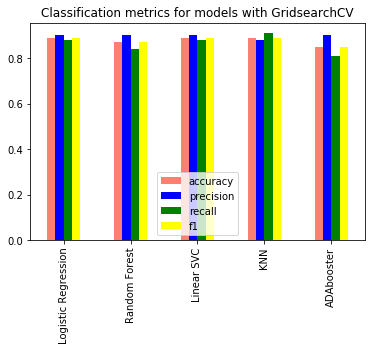

In [65]:
model_compare = pd.DataFrame(model_find_gscv_bst, index=['accuracy','precision','recall','f1'])
model_compare.T.plot.bar(color=['salmon','blue','green','yellow'],title="Classification metrics for models with GridsearchCV");

#### plotting AUC ,confusion matrix,Classification report after hypertuning with gridsearchCV for Logistics regression
* after finding the accuracy,precision,recall and f1 for all the models we are going with Logistics regression as it has bettered overall when compared to other models

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

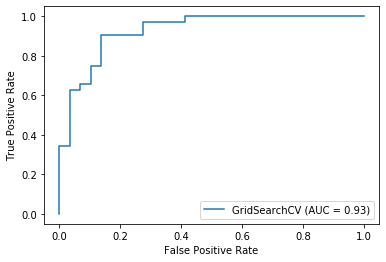

In [67]:
# AUC Curve:
np.random.seed(42)
grid_log={"solver": ["liblinear"],
              "penalty": ["l2"],
              "max_iter":[10],
              "C": [2.0]}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=LogisticRegression()
gs_clf = GridSearchCV(estimator=clf,
                                param_grid=grid_log,
                                cv=5,
                                verbose=True)
gs_clf.fit(x_train, y_train)
plot_roc_curve(gs_clf, x_test, y_test);

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

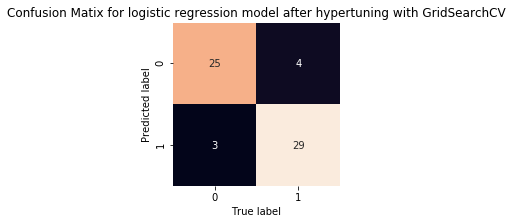

In [62]:
# Confusion matrix:
np.random.seed(42)
grid_log={"solver": ["liblinear"],
              "penalty": ["l2"],
              "max_iter":[10],
              "C": [2.0]}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=LogisticRegression()
gs_clf = GridSearchCV(estimator=clf,
                                param_grid=grid_log,
                                cv=5,
                                verbose=True)
gs_clf.fit(x_train, y_train)
y_preds=gs_clf.predict(x_test)
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
plt.title("Confusion Matix for logistic regression model after hypertuning with GridSearchCV")
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [68]:
# Classification matrix:
np.random.seed(42)
grid_log={"solver": ["liblinear"],
              "penalty": ["l2"],
              "max_iter":[10],
              "C": [2.0]}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=LogisticRegression()
gs_clf = GridSearchCV(estimator=clf,
                                param_grid=grid_log,
                                cv=5,
                                verbose=True)
gs_clf.fit(x_train, y_train)
y_preds=gs_clf.predict(x_test)
print(classification_report(y_test,y_preds))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

In [72]:
# 5 cross validation:
np.random.seed(42)
grid_log={"solver": ["liblinear"],
              "penalty": ["l2"],
              "max_iter":[10],
              "C": [2.0]}
model_rep = ['accuracy','precision','recall','f1']
model_finds_fv={}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=LogisticRegression()
gs_clf = GridSearchCV(estimator=clf,
                                param_grid=grid_log,
                                cv=5,
                                verbose=True)
gs_clf.fit(x_train, y_train)
for rep in model_rep:
    a=np.mean(cross_val_score(gs_clf,x,y,cv=5,scoring=rep))
    model_finds_fv[rep]=a
model_finds_fv

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceW

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceW

{'accuracy': 0.8314754098360655,
 'precision': 0.8245352409389162,
 'recall': 0.884848484848485,
 'f1': 0.8521793715643055}

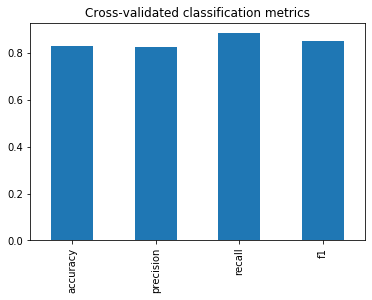

In [74]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame(model_finds_fv,index=["accuracy"])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

#### Feature importance

In [78]:
clf = LogisticRegression(solver="liblinear",
                         penalty="l2",
                         max_iter=10,
                         C=2.0)

clf.fit(x_train, y_train);


C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [80]:
# Match coef's of features to columns
feature_dict = dict(zip(hrt_dis.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.008698232464924899,
 'sex': -1.1557082445600686,
 'cp': 0.7742039665006748,
 'trestbps': -0.010964824761963903,
 'chol': -0.0015399897890684944,
 'fbs': 0.014430913211792856,
 'restecg': 0.4972234523434178,
 'thalach': 0.02583655634793794,
 'exang': -0.8018211045585125,
 'oldpeak': -0.6234496519585092,
 'slope': 0.5882367194492034,
 'ca': -0.7443157072366042,
 'thal': -0.9474318077305451}

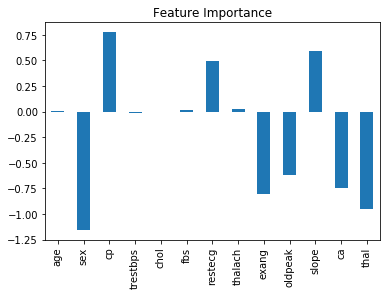

In [81]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

#### Removing unwanted columns and trying Logistic regression along with GridsearchCV on it

In [84]:
x=hrt_dis.drop(["target","age","trestbps","chol","fbs"],axis=1)
y=hrt_dis.target
np.random.seed(42)

# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2)

In [85]:
np.random.seed(42)
model=LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [91]:
# 5 cross validation:
np.random.seed(42)
grid_log={"solver": ["liblinear"],
              "penalty": ["l2"],
              "max_iter":[10],
              "C": [2.0]}
model_rep = ['accuracy','precision','recall','f1']
model_finds_fv={}
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=LogisticRegression()
gs_clf_fi = GridSearchCV(estimator=clf,
                                param_grid=grid_log,
                                cv=5,
                                verbose=True)
gs_clf_fi.fit(x_train, y_train)
for rep in model_rep:
    a=np.mean(cross_val_score(gs_clf_fi,x,y,cv=5,scoring=rep))
    model_finds_fv[rep]=a
model_finds_fv

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnin

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceW

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

{'accuracy': 0.8579234972677595,
 'precision': 0.8395833917649217,
 'recall': 0.9212121212121213,
 'f1': 0.877371945886457}

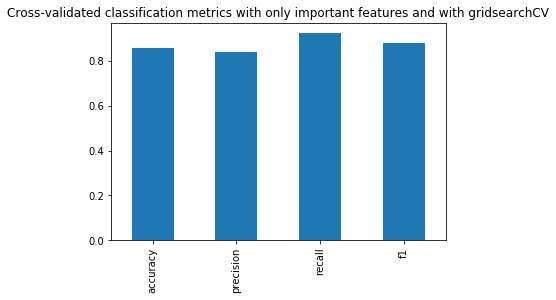

In [97]:
# Visualize cross-validated metrics
np.random.seed(42)
cv_metrics = pd.DataFrame(model_finds_fv,index=["accuracy"])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics with only important features and with gridsearchCV",
                      legend=False);

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
clf=LogisticRegression()
clf.fit(x_train, y_train)
y_preds=clf.predict(x_test)
accuracy= accuracy_score(y_test,y_preds)
precision=precision_score(y_test,y_preds)
recall=recall_score(y_test,y_preds)
f1=f1_score(y_test,y_preds)
metric_dict={"accuracy":round(accuracy,2),
                     "precision":round(precision,2),
                     "recall":round(recall,2),
                     "f1":round(f1,2)}
metric_dict

C:\Users\gokulakrishnan\Desktop\heart_disease_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'accuracy': 0.89, 'precision': 0.83, 'recall': 0.97, 'f1': 0.89}

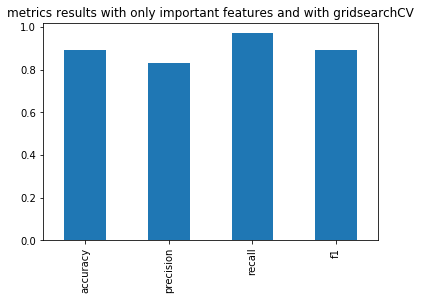

In [98]:
# Visualize metrics after having only important features
np.random.seed(42)
cv_metrics = pd.DataFrame(metric_dict,index=["accuracy"])

cv_metrics.T.plot.bar(title="metrics results with only important features and with gridsearchCV",
                      legend=False);

## Saving using Joblib

In [92]:
#save model to file
dump(gs_clf_fi,filename="gs_logisitic_regression_model_with_fi.joblib")

['gs_logisitic_regression_model_with_fi.joblib']

In [93]:
#import a saved joblib model
loaded_joblib_model=load(filename="gs_logisitic_regression_model_with_fi.joblib")
# make and evaluate joblib predictions
joblib_y_preds=loaded_joblib_model.predict(x_test)
print(classification_report(y_test,joblib_y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

